
# Crop Production Analysis

## Introduction
This notebook explores the dataset and answers key analytical questions using visualizations.

## Data Overview
### Dataset Summary
None

### First Few Rows
|    |   RowID | State_Name    | District_Name   |   Crop_Year | Season     | Crop      |   Area |   Production |
|---:|--------:|:--------------|:----------------|------------:|:-----------|:----------|-------:|-------------:|
|  0 |       0 | Bihar         | NALANDA         |        2005 | Rabi       | Wheat     |  81934 |       160425 |
|  1 |       1 | Assam         | KARBI ANGLONG   |        2019 | Whole Year | Onion     |    257 |          514 |
|  2 |       2 | Gujarat       | ANAND           |        2020 | Summer     | Maize     |    100 |          100 |
|  3 |       3 | Karnataka     | UTTAR KANNAD    |        2013 | Rabi       | Groundnut |   2872 |         4572 |
|  4 |       4 | Uttar Pradesh | JAUNPUR         |        2016 | Rabi       | Onion     |    110 |         1290 |

## Key Questions for Analysis
1. What is the overall trend of crop production over the years?
2. Which states have the highest and lowest crop production?
3. Which crops have the highest production?
4. How does production vary by season?
5. What is the relationship between area cultivated and production?
6. Which district produces the highest quantity of a given crop?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

In [2]:
df = pd.read_csv('IAS.csv')
df.head()

,RowID,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,Bihar,NALANDA,2005,Rabi,Wheat,81934.0,160425.0
1,1,Assam,KARBI ANGLONG,2019,Whole Year,Onion,257.0,514.0
2,2,Gujarat,ANAND,2020,Summer,Maize,100.0,100.0
3,3,Karnataka,UTTAR KANNAD,2013,Rabi,Groundnut,2872.0,4572.0
4,4,Uttar Pradesh,JAUNPUR,2016,Rabi,Onion,110.0,1290.0


### Q1: What is the overall trend of crop production over the years?

C:\Users\aditi\AppData\Local\Temp\ipykernel_24736\2441441216.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Crop_Year', y='Production', data=df, estimator=np.sum, ci=None)


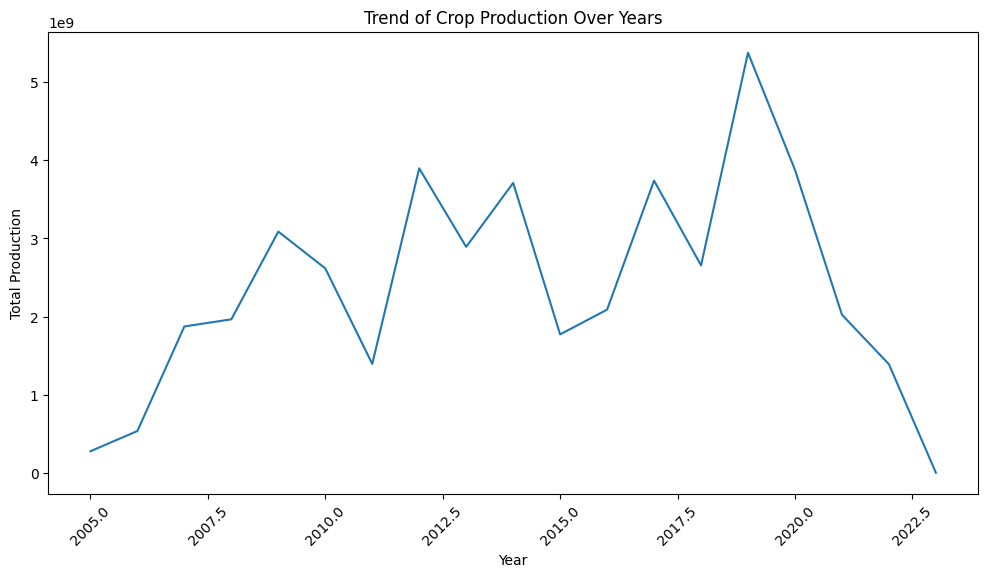

In [3]:

plt.figure(figsize=(12,6))
sns.lineplot(x='Crop_Year', y='Production', data=df, estimator=np.sum, ci=None)
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.title('Trend of Crop Production Over Years')
plt.xticks(rotation=45)
plt.show()


### Q2: Which states have the highest and lowest crop production?

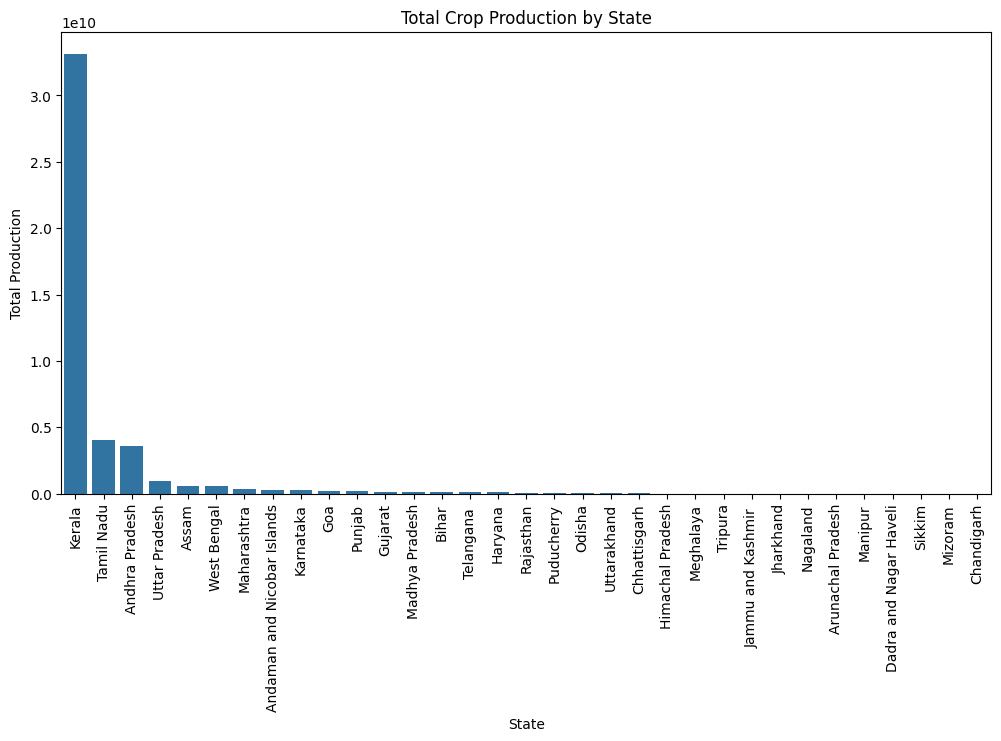

In [4]:

state_production = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=state_production.index, y=state_production.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Production')
plt.title('Total Crop Production by State')
plt.show()


### Q3: Which crops have the highest production?

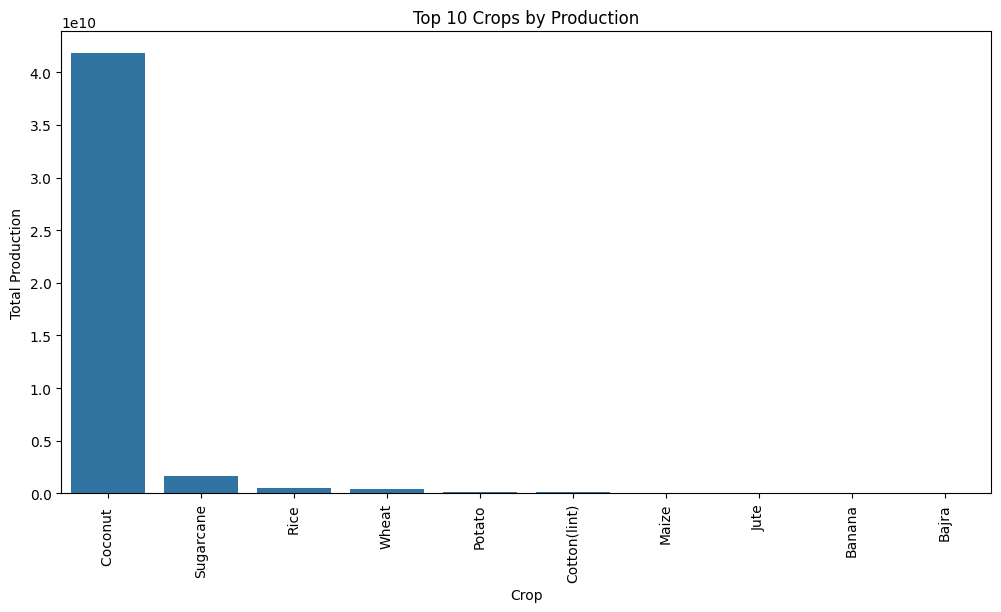

In [5]:

crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
sns.barplot(x=crop_production.index, y=crop_production.values)
plt.xticks(rotation=90)
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.title('Top 10 Crops by Production')
plt.show()


### Q4: How does production vary by season?

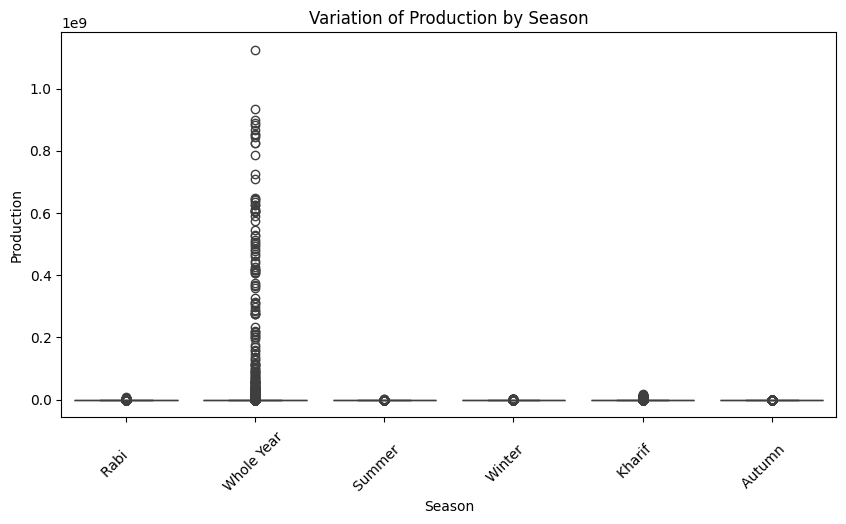

In [6]:

plt.figure(figsize=(10,5))
sns.boxplot(x='Season', y='Production', data=df)
plt.xticks(rotation=45)
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Variation of Production by Season')
plt.show()


### Q5: What is the relationship between area cultivated and production?

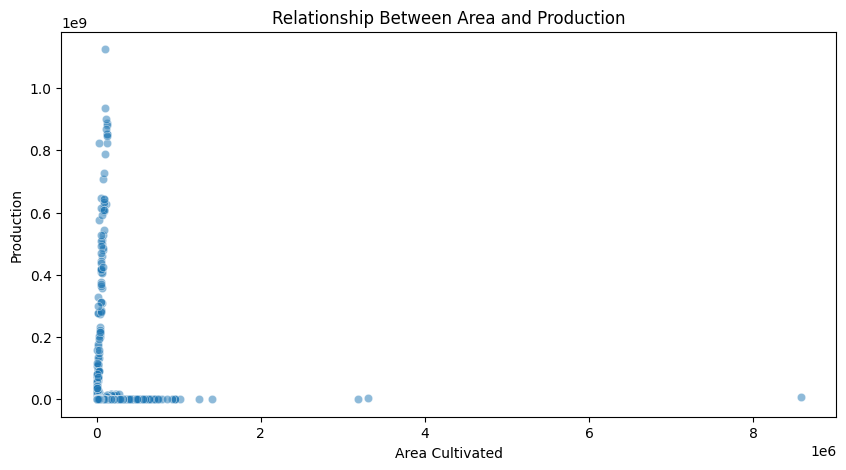

In [7]:

plt.figure(figsize=(10,5))
sns.scatterplot(x='Area', y='Production', data=df, alpha=0.5)
plt.xlabel('Area Cultivated')
plt.ylabel('Production')
plt.title('Relationship Between Area and Production')
plt.show()


### Q6: Which district produces the highest quantity of a given crop?

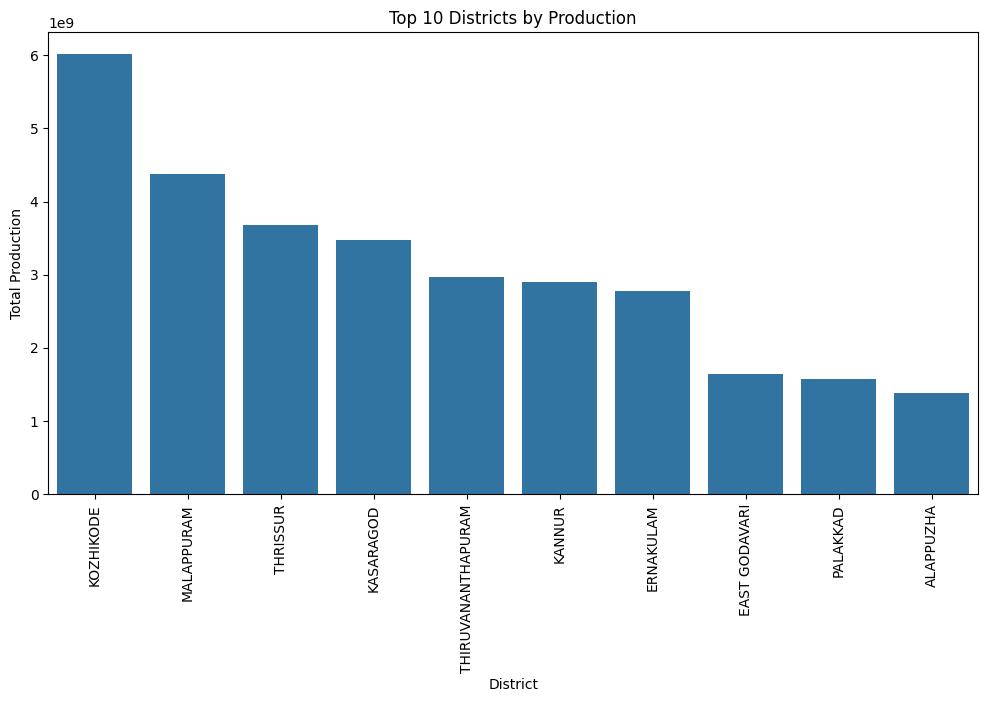

In [8]:

district_production = df.groupby('District_Name')['Production'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
sns.barplot(x=district_production.index, y=district_production.values)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Total Production')
plt.title('Top 10 Districts by Production')
plt.show()
